In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Numerical Methods/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df = df[['tenure','Dependents', 'MultipleLines', 'InternetService', 'PhoneService', 'PaymentMethod', 'TotalCharges', 'Contract',  'StreamingTV', 'OnlineBackup','Churn']]
df.head()

,tenure,Dependents,MultipleLines,InternetService,PhoneService,PaymentMethod,TotalCharges,Contract,StreamingTV,OnlineBackup,Churn
0,1,No,No phone service,DSL,No,Electronic check,29.85,Month-to-month,No,Yes,No
1,34,No,No,DSL,Yes,Mailed check,1889.5,One year,No,No,No
2,2,No,No,DSL,Yes,Mailed check,108.15,Month-to-month,No,Yes,Yes
3,45,No,No phone service,DSL,No,Bank transfer (automatic),1840.75,One year,No,No,No
4,2,No,No,Fiber optic,Yes,Electronic check,151.65,Month-to-month,No,No,Yes


# Exploratory Data Analysis

In [4]:
import pandas_profiling

In [5]:
prof = pandas_profiling.ProfileReport(df)
prof


In [6]:
print(f'Shape before dropping duplicates {df.shape}')
df = df.drop_duplicates()
print(f'Shape after dropping duplicates {df.shape}')

Shape before dropping duplicates (7043, 11)
Shape after dropping duplicates (6964, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6964 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tenure           6964 non-null   int64 
 1   Dependents       6964 non-null   object
 2   MultipleLines    6964 non-null   object
 3   InternetService  6964 non-null   object
 4   PhoneService     6964 non-null   object
 5   PaymentMethod    6964 non-null   object
 6   TotalCharges     6964 non-null   object
 7   Contract         6964 non-null   object
 8   StreamingTV      6964 non-null   object
 9   OnlineBackup     6964 non-null   object
 10  Churn            6964 non-null   object
dtypes: int64(1), object(10)
memory usage: 652.9+ KB


<AxesSubplot:xlabel='Churn', ylabel='count'>

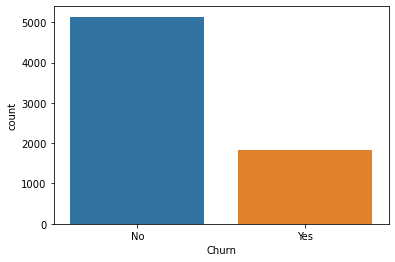

In [8]:
sns.countplot(x=df["Churn"])

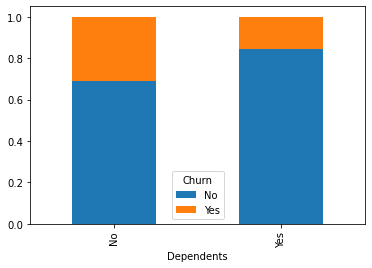

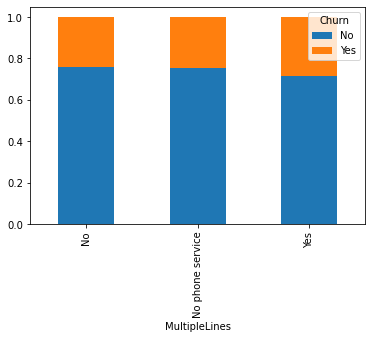

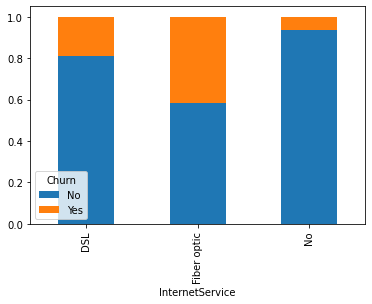

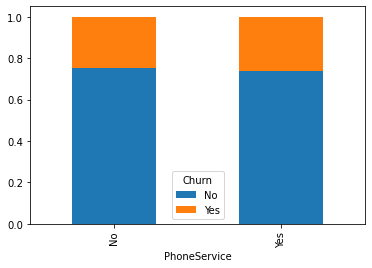

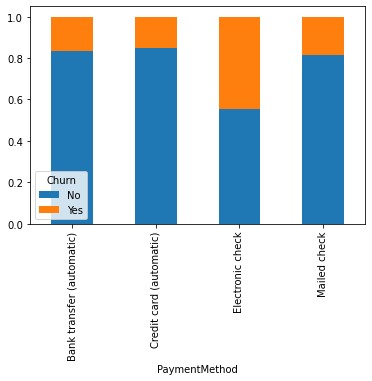

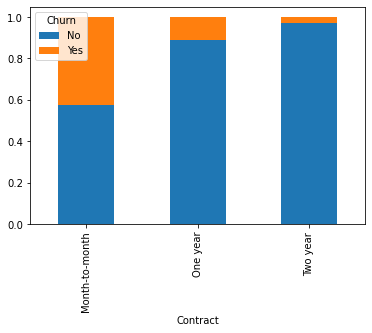

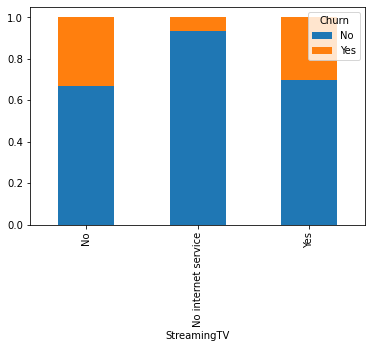

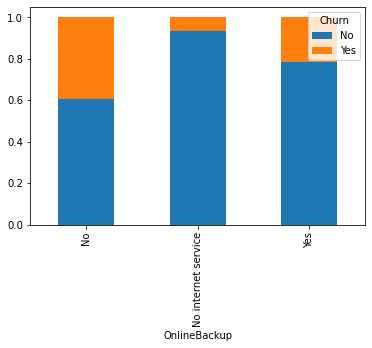

In [9]:
categories = ['Dependents', 'MultipleLines', 'InternetService', 'PhoneService', 'PaymentMethod', 'Contract',  'StreamingTV', 'OnlineBackup']

for cat in categories:
    cross_tab = pd.crosstab(df[cat], df['Churn'], normalize='index')
    cross_tab.plot.bar(stacked=True)
    plt.show()

In [10]:
print("Churn          :",df["Churn"].unique())
print("Dependents     :",df["Dependents"].unique())
print("MultipleLines  :",df["MultipleLines"].unique())
print("InternetService:",df["InternetService"].unique())
print("PhoneService   :",df["PhoneService"].unique())
print("PaymentMethod  :",df["PaymentMethod"].unique())
print("Contract       :",df["Contract"].unique())
print("StreamingTV    :",df["StreamingTV"].unique())
print("OnlineBackup   :",df["OnlineBackup"].unique())

Churn          : ['No' 'Yes']
Dependents     : ['No' 'Yes']
MultipleLines  : ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
PhoneService   : ['No' 'Yes']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract       : ['Month-to-month' 'One year' 'Two year']
StreamingTV    : ['No' 'Yes' 'No internet service']
OnlineBackup   : ['Yes' 'No' 'No internet service']


In [11]:
# Convert variables with two categories into binary variables
df.loc[df["Churn"] == "No", "Churn"] = 0
df.loc[df["Churn"] == "Yes", "Churn"] = 1
df["Churn"] = df["Churn"].astype(int)

df.loc[df["Dependents"] == "No", "Dependents"] = 0
df.loc[df["Dependents"] == "Yes", "Dependents"] = 1
df["Dependents"] = df["Dependents"].astype(int)

df.loc[df["PhoneService"] == "No", "PhoneService"] = 0
df.loc[df["PhoneService"] == "Yes", "PhoneService"] = 1
df["PhoneService"] = df["PhoneService"].astype(int)

df.head()

C:\Users\neelk\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-11-c13e0287e328>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].astype(int)
<ipython-input-11-c13e0287e328>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,tenure,Dependents,MultipleLines,InternetService,PhoneService,PaymentMethod,TotalCharges,Contract,StreamingTV,OnlineBackup,Churn
0,1,0,No phone service,DSL,0,Electronic check,29.85,Month-to-month,No,Yes,0
1,34,0,No,DSL,1,Mailed check,1889.5,One year,No,No,0
2,2,0,No,DSL,1,Mailed check,108.15,Month-to-month,No,Yes,1
3,45,0,No phone service,DSL,0,Bank transfer (automatic),1840.75,One year,No,No,0
4,2,0,No,Fiber optic,1,Electronic check,151.65,Month-to-month,No,No,1


In [12]:
df['TotalCharges'] = df['TotalCharges'].replace({" ":'0'})
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.head()

<ipython-input-12-7817096b57f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].replace({" ":'0'})
<ipython-input-12-7817096b57f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


,tenure,Dependents,MultipleLines,InternetService,PhoneService,PaymentMethod,TotalCharges,Contract,StreamingTV,OnlineBackup,Churn
0,1,0,No phone service,DSL,0,Electronic check,29.85,Month-to-month,No,Yes,0
1,34,0,No,DSL,1,Mailed check,1889.50,One year,No,No,0
2,2,0,No,DSL,1,Mailed check,108.15,Month-to-month,No,Yes,1
3,45,0,No phone service,DSL,0,Bank transfer (automatic),1840.75,One year,No,No,0
4,2,0,No,Fiber optic,1,Electronic check,151.65,Month-to-month,No,No,1


In [13]:
#One Hot encoding
df = pd.get_dummies(df)
df.head()

,tenure,Dependents,PhoneService,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,1,0,0,29.85,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,34,0,1,1889.50,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
2,2,0,1,108.15,1,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
3,45,0,0,1840.75,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,2,0,1,151.65,1,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [14]:
# Split data into train and test Datasets

# Separate the dataset into features and target
X = df.drop(["Churn"],axis=1)
y = df["Churn"]

y.value_counts()

0    5138
1    1826
Name: Churn, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:

# SMOTE
smote_X_train, smote_y_train = SMOTE().fit_resample(X_train,y_train)

In [99]:
# Check the results of rebalancing


# SMOTE
print("SMOTE\n", smote_y_train.value_counts())

SMOTE
 1    3578
0    3578
Name: Churn, dtype: int64


In [100]:
datasets = [X_train, y_train, smote_X_train, smote_y_train,]

for dataset in datasets:
    pd.DataFrame(dataset)

In [101]:
# Concatenate training and test sets for each resampled datasets
train_concat = pd.concat([X_train, y_train], axis=1)
smote_train_concat = pd.concat([smote_X_train, smote_y_train], axis=1)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

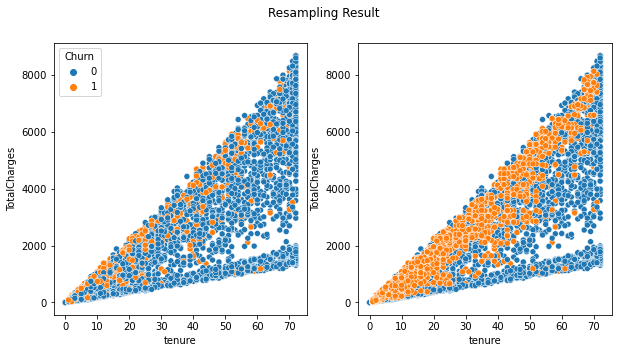

In [102]:
# Visualize resampling results
fig, axes = plt.subplots(1, 2, figsize=(10, 5),squeeze=True)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Resampling Result')

sns.scatterplot(ax=axes[0], data=train_concat, x='tenure', y='TotalCharges', hue='Churn')
sns.scatterplot(ax=axes[1], data=smote_train_concat, x='tenure', y='TotalCharges', hue='Churn',legend=False)

In [103]:
from sklearn.preprocessing import StandardScaler
# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
# Apply rebalancing to standardized data

# SMOTE
smote_X_train, smote_y_train = SMOTE().fit_resample(X_train,y_train)

In [105]:
# Check the results of rebalancing

# SMOTE
print("SMOTE\n", smote_y_train.value_counts())

SMOTE
 1    3578
0    3578
Name: Churn, dtype: int64


In [106]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Create a model dictionary
models = {"Logistic Regression   ": LogisticRegression(),
          "XGBoost               ": XGBClassifier()}

In [107]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Fit the models on imbalanced data
for name, model in models.items():
    model.fit(X_train, y_train)

# Print AUC score
print("Imbalanced Data: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(X_test))))

C:\Users\neelk\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Imbalanced Data: AUC score
Logistic Regression   : 0.719
XGBoost               : 0.694


In [108]:
# Fit the models: SMOTE
for name, model in models.items():
    model.fit(smote_X_train, smote_y_train)

# Print AUC score
print("SMOTE: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(X_test))))

C:\Users\neelk\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SMOTE: AUC score
Logistic Regression   : 0.759
XGBoost               : 0.736


In [109]:
Y_pred = model.predict(X_test)
Y_pred.shape

(2090,)

In [110]:
Y_pred_prob = model.predict_proba(X_test)
Y_pred_prob

array([[0.99766123, 0.00233875],
       [0.220397  , 0.779603  ],
       [0.58407414, 0.4159259 ],
       ...,
       [0.9358517 , 0.06414831],
       [0.612489  , 0.38751101],
       [0.99626935, 0.00373068]], dtype=float32)

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
z = confusion_matrix(y_test, Y_pred, labels=[1,0])
print(z)
np.asarray(z)

[[ 360  170]
 [ 323 1237]]


array([[ 360,  170],
       [ 323, 1237]], dtype=int64)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

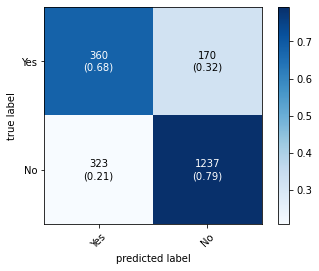

In [114]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=z,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Yes','No'])

In [113]:
print (classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1560
           1       0.53      0.68      0.59       530

    accuracy                           0.76      2090
   macro avg       0.70      0.74      0.71      2090
weighted avg       0.79      0.76      0.77      2090

